In [1]:
import os
print(os.getpid())

2400


In [2]:
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
#import cv2
(train_images, train_labels),(test_images, test_labels)= keras.datasets.mnist.load_data() 

image_size = 27
train_images = np.expand_dims(train_images, axis = -1)
train_images = tf.image.resize(train_images,[image_size,image_size])
train_images = np.squeeze(train_images)
train_images = train_images/255.0

test_images = np.expand_dims(test_images, axis = -1)
test_images = tf.image.resize(test_images,[image_size,image_size])
test_images = np.squeeze(test_images)
test_images= test_images/255.0
#이미지 resize

for k in range(train_images.shape[0]):
  for i in range(image_size):
    for j in range(image_size):
      if train_images[k,i,j] <0.5:
        train_images[k, i, j] = 0
      else :
        train_images[k, i,j] = 1

for k in range(test_images.shape[0]) :
  for i in range(image_size):
    for j in range(image_size):
      if test_images[k, i,j] <0.5:
        test_images[k, i, j] = 0
      else :
        test_images[k, i,j] = 1
# 0 0.5 1 셋 중 하나의 값으로 바꿔줌

'''
###################데이터 나누기 
train = [[],[],[],[],[],[],[],[],[],[]]
for k in range(train_images.shape[0]):
  if train_labels[k] ==0:
    train[0].append(train_images[k])
  elif train_labels[k] ==1:
    train[1].append(train_images[k])
  elif train_labels[k] ==2:
    train[2].append(train_images[k])
  elif train_labels[k] ==3:
    train[3].append(train_images[k])
  elif train_labels[k] ==4:
    train[4].append(train_images[k])
  elif train_labels[k] ==5:
    train[5].append(train_images[k])
  elif train_labels[k] ==6:
    train[6].append(train_images[k])
  elif train_labels[k] ==7:
    train[7].append(train_images[k])
  elif train_labels[k] ==8:
    train[8].append(train_images[k])
  elif train_labels[k] ==9:
    train[9].append(train_images[k])
  else:
    train_images[k] = train_images[k]
'''

'\n###################데이터 나누기 \ntrain = [[],[],[],[],[],[],[],[],[],[]]\nfor k in range(train_images.shape[0]):\n  if train_labels[k] ==0:\n    train[0].append(train_images[k])\n  elif train_labels[k] ==1:\n    train[1].append(train_images[k])\n  elif train_labels[k] ==2:\n    train[2].append(train_images[k])\n  elif train_labels[k] ==3:\n    train[3].append(train_images[k])\n  elif train_labels[k] ==4:\n    train[4].append(train_images[k])\n  elif train_labels[k] ==5:\n    train[5].append(train_images[k])\n  elif train_labels[k] ==6:\n    train[6].append(train_images[k])\n  elif train_labels[k] ==7:\n    train[7].append(train_images[k])\n  elif train_labels[k] ==8:\n    train[8].append(train_images[k])\n  elif train_labels[k] ==9:\n    train[9].append(train_images[k])\n  else:\n    train_images[k] = train_images[k]\n'

# Padding

In [3]:
# zero padding 적용 함수
def padding(images, padding_size):
    num_images, old_height, old_width = images.shape
    new_height, new_width = old_height + 2 * padding_size, old_width + 2 * padding_size
    padded_images = np.zeros((num_images, new_height, new_width))
    
    for i in range(num_images):
        padded_images[i, padding_size:new_height-padding_size, padding_size:new_width-padding_size] = images[i]
    
    return padded_images

print("Original Train Image Shape:", train_images.shape)


# zero padding 적용
padding_size = 1
train_images = padding(train_images, padding_size)
# test_images_padded = padding(test_images, padding_size)

print("Padded Train Image Shape:", train_images.shape)

Original Train Image Shape: (60000, 27, 27)
Padded Train Image Shape: (60000, 29, 29)


# Thinning, Thickening
    with 2*2 filter

In [4]:
# pattern
thick_edge_pattern = []

thick_edge_pattern.append([1,1,0,0])
thick_edge_pattern.append([0,0,1,1])
thick_edge_pattern.append([1,0,1,0])
thick_edge_pattern.append([0,1,0,1])
thick_edge_pattern.append([0,0,1,0])
#thick_edge_pattern.append([0,1,0,0])
#thick_edge_pattern.append([1,0,0,0])
thick_edge_pattern.append([0,0,0,1])

In [5]:
# pattern
thin_edge_pattern = []

thin_edge_pattern.append([1,1,0,0])
#thin_edge_pattern.append([0,0,1,1])
thin_edge_pattern.append([1,0,1,0])
#thin_edge_pattern.append([0,1,0,1])
thin_edge_pattern.append([0,0,1,0])
#thin_edge_pattern.append([0,1,0,0])
#thin_edge_pattern.append([1,0,0,0])
thin_edge_pattern.append([0,0,0,1])

In [6]:
print(thick_edge_pattern)
print(thin_edge_pattern)

[[1, 1, 0, 0], [0, 0, 1, 1], [1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]]
[[1, 1, 0, 0], [1, 0, 1, 0], [0, 0, 1, 0], [0, 0, 0, 1]]


In [7]:
def thickening(image):
    thick_img = []
    thick_img = [[0] * 27 for _ in range(27)]
    
    for i in range(27):
        for j in range(27):
            pattern1 = [(image[i][j]), (image[i][j+1]),
                        (image[i+1][j]), (image[i+1][j+1])]
            pattern2 = [(image[i][j+1]), (image[i][j+2]),
                        (image[i+1][j+1]), (image[i+1][j+2])]
            pattern3 = [(image[i+1][j]), (image[i+1][j+1]),
                        (image[i+2][j]), (image[i+2][j+1])]
            pattern4 = [(image[i+1][j+1]), (image[i+1][j+2]),
                        (image[i+2][j+1]), (image[i+2][j+2])]
            
            for x in thick_edge_pattern:
                if (pattern1 == x):
                    thick_img[i][j] = 1
                    break
                elif (pattern2 == x):
                    thick_img[i][j] = 1
                    break
                elif (pattern3 == x):
                    thick_img[i][j] = 1
                    break
                elif (pattern4 == x):
                    thick_img[i][j] = 1
                    break
                elif (x==[0,0,0,1]):
                    thick_img[i][j] = image[i+1][j+1]
            
    return thick_img

In [8]:
def thinning(image):
    thinned_img = []
    thinned_img = [[0] * 27 for _ in range(27)]
    
    for i in range(27):
        for j in range(27):
            pattern1 = [(image[i][j]), (image[i][j+1]),
                        (image[i+1][j]), (image[i+1][j+1])]
            pattern2 = [(image[i][j+1]), (image[i][j+2]),
                        (image[i+1][j+1]), (image[i+1][j+2])]
            pattern3 = [(image[i+1][j]), (image[i+1][j+1]),
                        (image[i+2][j]), (image[i+2][j+1])]
            pattern4 = [(image[i+1][j+1]), (image[i+1][j+2]),
                        (image[i+2][j+1]), (image[i+2][j+2])]
            
            for x in thin_edge_pattern:
                if (pattern1 == x):
                    thinned_img[i][j] = 0
                    break
                elif (pattern2 == x):
                    thinned_img[i][j] = 0
                    break
                elif (pattern3 == x):
                    thinned_img[i][j] = 0
                    break
                elif (pattern4 == x):
                    thinned_img[i][j] = 0
                    break
                elif (x==[0,0,0,1]):
                    thinned_img[i][j] = image[i+1][j+1]
            
    return thinned_img

Text(0.5, 1.0, 'thickening')

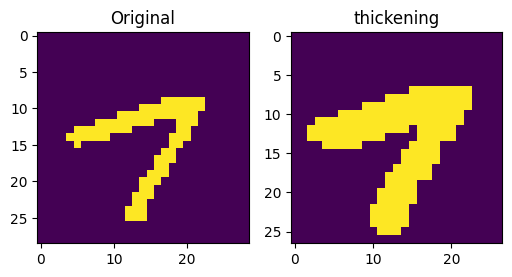

In [21]:
data = train_images[101]
thick = thickening(data)

f, (a1, a2) = plt.subplots(1, 2, figsize=(6, 3))
a1.imshow(data)
a1.set_title("Original")
a2.imshow(thick)
a2.set_title("thickening")

Text(0.5, 1.0, 'thinning')

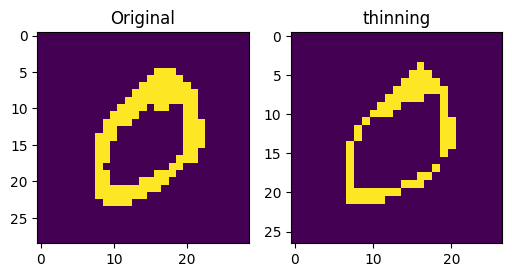

In [24]:
data = train_images[1]
thin = thinning(data)

f, (a1, a2) = plt.subplots(1, 2, figsize=(6, 3))
a1.imshow(data)
a1.set_title("Original")
a2.imshow(thin)
a2.set_title("thinning")

# Match

In [11]:
def Thick_TCAM(BLA,BLB,CLA,CLB):

  ML = 0
  cnt = 0
  
  for i in range(len(BLA)):
    for j in range(len(BLA[i])):
      if(CLA[i][j] == BLA[i][j]):
        if(CLB[i][j] == BLB[i][j]):
          cnt = cnt + 1
      elif(CLA[i][j] == 0):
        cnt = cnt +1

      else:
        cnt = cnt

  if(cnt == 729):
    ML = 1
    print("Match")
    
  elif(ML == 0):
    print("No Match")

  
  return ML

In [12]:
def rev(pattern):
  new=[]
  for i in range(len(pattern)):
    if(pattern[i] == 1):
      new.append(0)
    else:
      new.append(1)
  
  return new

In [25]:
thick_rev = []
for i in range(len(thick)):
    thick_rev.append(rev(thick[i]))

thin_rev = []
for i in range(len(thin)):
    thin_rev.append(rev(thin[i]))

Thick_TCAM(thick, thick_rev, thin, thin_rev)

No Match


0